# **Diamonds Unveiled : Predicting Diamond Prices with Machine Learning**

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('diamonds.csv')

# **Data Preprocessing**

In [62]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [63]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [64]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [65]:
df.shape

(53940, 10)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [67]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [68]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [69]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [70]:
df.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [71]:
df.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

# **Exploratory Data Analysis (EDA)**

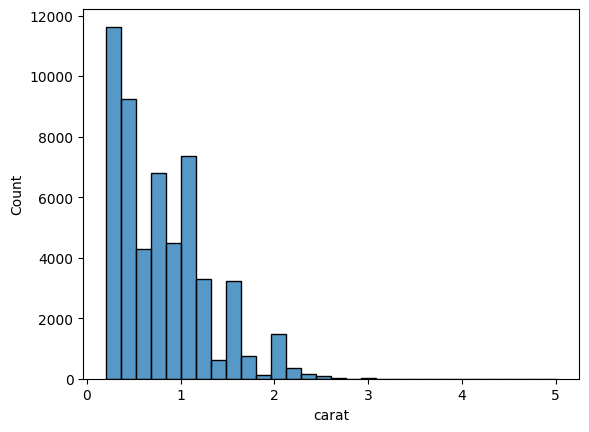

In [72]:
sns.histplot(df['carat'],bins=30)
plt.show()

**Observation : Most of the diamonds are less than 2 carats**

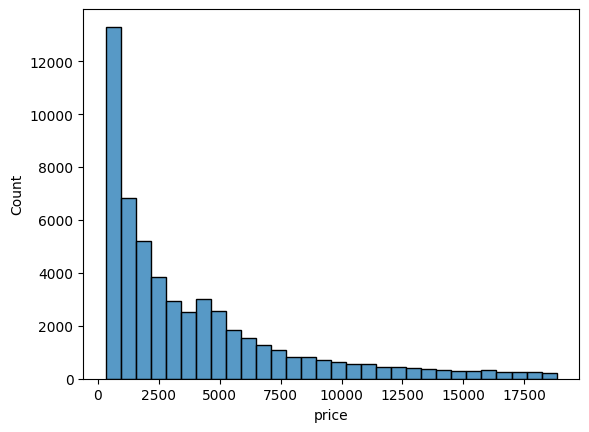

In [73]:
sns.histplot(df['price'],bins=30)
plt.show()

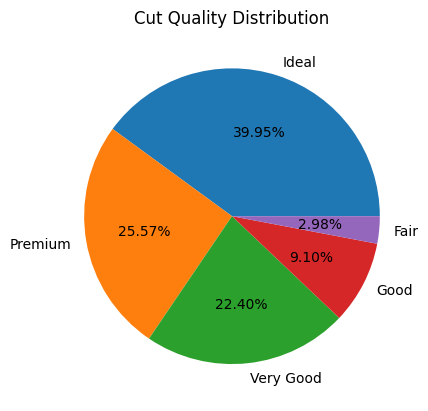

In [74]:
plt.pie(df['cut'].value_counts(), labels=['Ideal','Premium','Very Good','Good','Fair'], autopct= "%1.2f%%")
plt.title('Cut Quality Distribution')
plt.show()

**Observation : Almost 40% of the diamonds have Ideal cut quality which is considered to be best amongst all**

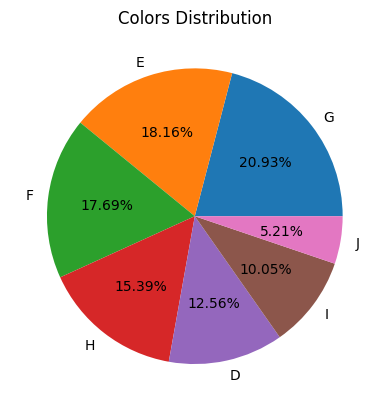

In [75]:
plt.pie(df['color'].value_counts(), labels=['G','E','F','H','D','I','J'], autopct= "%1.2f%%")
plt.title('Colors Distribution')
plt.show()

**Observation : 12.56% of the diamonds have best color D**

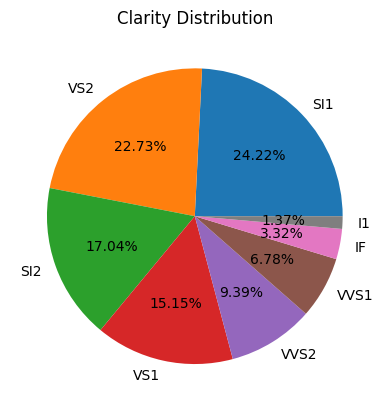

In [76]:
plt.pie(df['clarity'].value_counts(), labels=['SI1','VS2','SI2','VS1','VVS2','VVS1','IF','I1'], autopct="%1.2f%%")
plt.title('Clarity Distribution')
plt.show()

**Observation : 3.32% of the diamonds have best clarity among all**

In [77]:
df['cut'] = df['cut'].map({'Ideal':5,'Premium':4,'Very Good':3,'Good':2,'Fair':1})
df['color'] = df['color'].map({'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1})
df['clarity'] = df['clarity'].map({'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1})

In [78]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


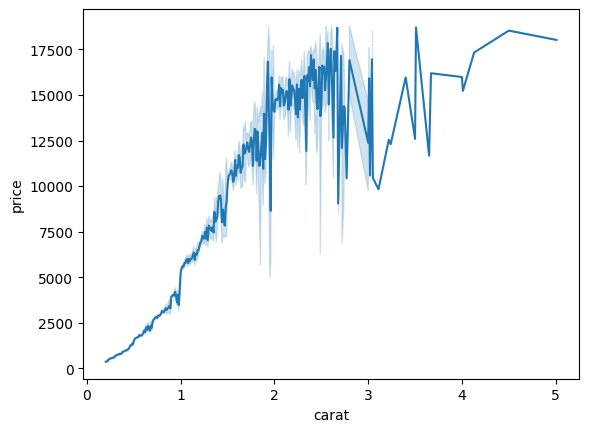

In [79]:
sns.lineplot(data = df, x='carat', y='price')
plt.show()

**Observation : The price of diamonds increases with increase in carat weight of diamonds**

In [80]:
df.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134967,-0.291437,-0.352841,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,-0.134967,1.000000,0.020519,0.189175,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323
color,-0.291437,0.020519,1.000000,-0.025631,-0.047279,-0.026465,-0.172511,-0.270287,-0.263584,-0.268227
clarity,-0.352841,0.189175,-0.025631,1.000000,-0.067384,-0.160327,-0.146800,-0.371999,-0.358420,-0.366952
depth,0.028224,-0.218055,-0.047279,-0.067384,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.433405,-0.026465,-0.160327,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.053491,-0.172511,-0.146800,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.125565,-0.270287,-0.371999,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.121462,-0.263584,-0.358420,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,-0.149323,-0.268227,-0.366952,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


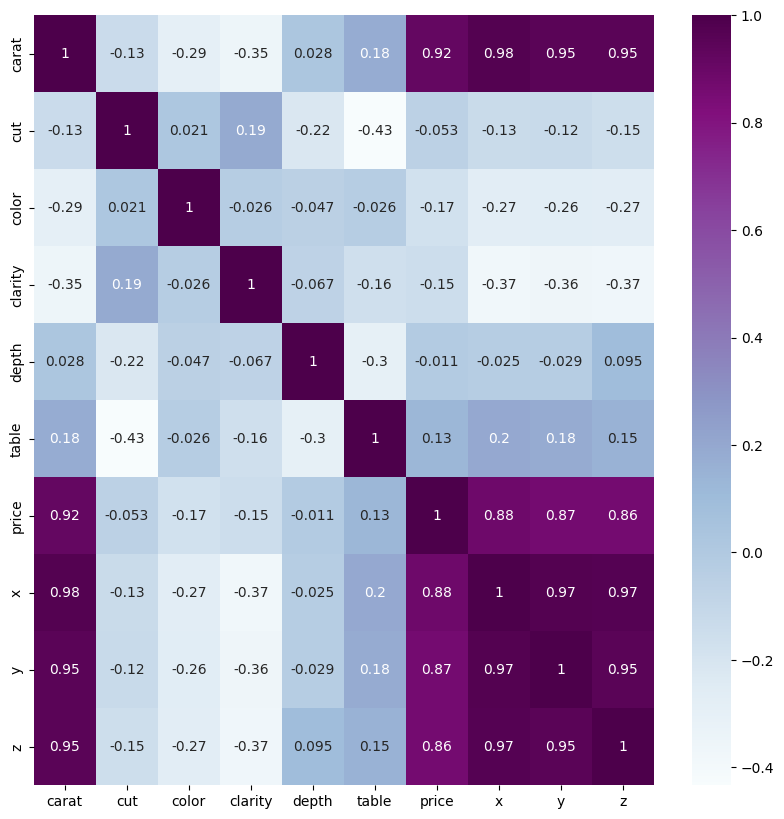

In [81]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='BuPu')
plt.show()

In [82]:
X = df.drop(['price'], axis=1)
y = df['price']


# **Applying regression algorithms**

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# **Decision Tree Regression**

In [84]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [85]:
dt_pred = dt.predict(X_test)

<ipython-input-86-408c123d945f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
<ipython-input-86-408c123d945f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt_pred,hist=False,color='b',label='Fitted Values',ax=ax)


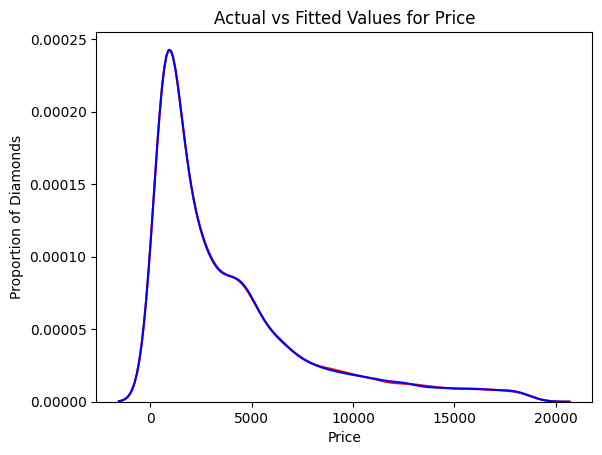

In [86]:
ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(dt_pred,hist=False,color='b',label='Fitted Values',ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Diamonds')
plt.show()

In [87]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('For Decision Tree Regression - ')
print('RMSE:',np.sqrt(mean_squared_error(y_test,dt_pred)))
print('Accuracy:',dt.score(X_test,y_test))
print('MAE:',mean_absolute_error(y_test,dt_pred))

For Decision Tree Regression - 
RMSE: 738.3181898524514
Accuracy: 0.9657092613678562
MAE: 354.0583518724509


# **Random Forest Regression**

In [88]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [89]:
rf_pred = rf.predict(X_test)

<ipython-input-90-e7ffa408ecdb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
<ipython-input-90-e7ffa408ecdb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rf_pred,hist=False,color='b',label='Fitted Values',ax=ax)


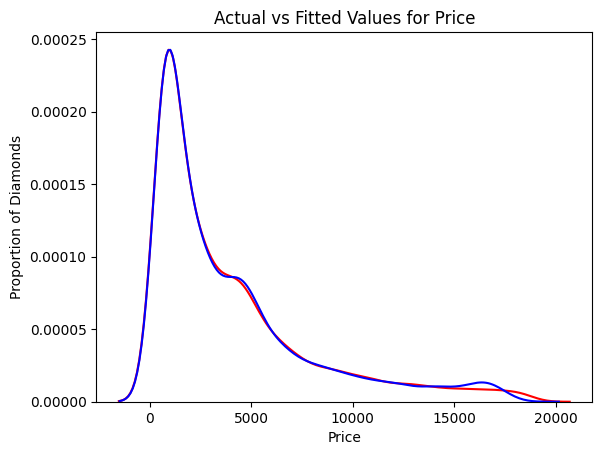

In [90]:
ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(rf_pred,hist=False,color='b',label='Fitted Values',ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Diamonds')
plt.show()

In [91]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('For Random Forest Regression : ')
print('RMSE:',np.sqrt(mean_squared_error(y_test,rf_pred)))
print('Accuracy:',rf.score(X_test,y_test))
print('MAE:',mean_absolute_error(y_test,rf_pred))

For Random Forest Regression : 
RMSE: 542.8785331210364
Accuracy: 0.9814606270425025
MAE: 266.79153207340903


## **Conclusion :**
Random forest regressor model is better than Decision tree regressor model in terms of accuracy. We are 98.14% sure that our predicted prices of diamonds matches with actual prices.